### **TRATAMENTO DO DATASET**

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn import tree
from matplotlib.colors import LinearSegmentedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.decomposition import PCA
import numpy as np

df = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)    


df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3964
1,3038-PQIUY,1,United States,California,Dulzura,91917,"32.622999, -116.687855",32.622999,-116.687855,Female,No,No,No,38,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),66.15,2522.4,No,4933
2,1468-DEFNC,1,United States,California,San Jose,95130,"37.277592, -121.986477",37.277592,-121.986477,Male,Yes,Yes,Yes,64,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.40,1548.65,No,4772
3,6437-UDQJM,1,United States,California,Los Angeles,90023,"34.017697, -118.200577",34.017697,-118.200577,Female,Yes,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),84.10,6129.65,No,4999
4,9490-DFPMD,1,United States,California,Tahoma,96142,"39.061227, -120.179546",39.061227,-120.179546,Female,Yes,No,No,42,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes,4871


In [387]:
total_faltantes = df.isnull().sum().sum()
print(f'Total de dados faltantes: {total_faltantes}')

Total de dados faltantes: 0


### **TRATAMENTO DOS DADOS**

In [388]:
#Baseado nas informações do dataset do Kaggle, algumas colunas não serão necessárias para o treinamento por possuírem valores únicos

df = df.drop(['Count', 'Country', 'State', 'Lat Long', ], axis = 1)
df_test = df_test.drop(['Count', 'Country', 'State', 'Lat Long', ], axis = 1)

In [389]:
print(df.dtypes)

CustomerID            object
City                  object
Zip Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
CLTV                   int64
dtype: object


In [390]:
columns = [ 'Multiple Lines','Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies' ]

for column in columns:
    valores_unicos = df[column].unique()
    print(f'Valores únicos na coluna "{column}": {valores_unicos}')

Valores únicos na coluna "Multiple Lines": ['No phone service' 'Yes' 'No']
Valores únicos na coluna "Online Security": ['No' 'Yes' 'No internet service']
Valores únicos na coluna "Online Backup": ['Yes' 'No internet service' 'No']
Valores únicos na coluna "Device Protection": ['No' 'Yes' 'No internet service']
Valores únicos na coluna "Tech Support": ['No' 'No internet service' 'Yes']
Valores únicos na coluna "Streaming TV": ['No' 'No internet service' 'Yes']
Valores únicos na coluna "Streaming Movies": ['No' 'No internet service' 'Yes']


In [391]:
replacement_dict = {'No internet service': 'No'}
df['Multiple Lines'] = df['Multiple Lines'].replace('No phone service', 'No')
df_test['Multiple Lines'] = df_test['Multiple Lines'].replace('No phone service', 'No')
for column in columns:
    df[column] = df[column].replace('No internet service', 'No')
    df_test[column] = df_test[column].replace('No internet service', 'No')

for column in columns:
    valores_unicos = df[column].unique()
    print(f'Valores únicos na coluna "{column}": {valores_unicos}')

Valores únicos na coluna "Multiple Lines": ['No' 'Yes']
Valores únicos na coluna "Online Security": ['No' 'Yes']
Valores únicos na coluna "Online Backup": ['Yes' 'No']
Valores únicos na coluna "Device Protection": ['No' 'Yes']
Valores únicos na coluna "Tech Support": ['No' 'Yes']
Valores únicos na coluna "Streaming TV": ['No' 'Yes']
Valores únicos na coluna "Streaming Movies": ['No' 'Yes']


In [392]:
replacement_dict = {'No': 0, 'Yes': 1}
replacement_gender = {'Female': 0, 'Male': 1}
columns_to_map = ['Senior Citizen','Partner','Dependents','Phone Service', 'Multiple Lines','Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Churn Label' ]

for column in columns_to_map:
    df[column] = df[column].map(replacement_dict)

df['Gender'] = df['Gender'].map(replacement_gender)

# DF TESTE -----------------------------------------------------------
columns_to_map_test = ['Senior Citizen','Partner','Dependents','Phone Service', 'Multiple Lines','Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing' ]

for column in columns_to_map_test:
    df_test[column] = df_test[column].map(replacement_dict)

df_test['Gender'] = df_test['Gender'].map(replacement_gender)

# MOSTRA DF
df.head()

,CustomerID,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,7590-VHVEG,Los Angeles,90001,33.973616,-118.249020,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,3964
1,3038-PQIUY,Dulzura,91917,32.622999,-116.687855,0,0,0,0,38,1,1,DSL,1,1,1,0,0,0,Month-to-month,1,Bank transfer (automatic),66.15,2522.4,0,4933
2,1468-DEFNC,San Jose,95130,37.277592,-121.986477,1,1,1,1,64,1,1,No,0,0,0,0,0,0,Two year,1,Bank transfer (automatic),24.40,1548.65,0,4772
3,6437-UDQJM,Los Angeles,90023,34.017697,-118.200577,0,1,1,0,72,1,1,DSL,1,1,1,0,1,1,Two year,1,Credit card (automatic),84.10,6129.65,0,4999
4,9490-DFPMD,Tahoma,96142,39.061227,-120.179546,0,1,0,0,42,1,1,Fiber optic,0,0,0,0,1,0,Month-to-month,1,Electronic check,84.65,3541.35,1,4871


In [393]:
columns_to_encode = ['City', 'Internet Service', 'Contract', 'Payment Method']

for column in columns_to_encode:
    valores_unicos = df[column].unique()
    print(f'Valores únicos na coluna "{column}": {valores_unicos}')

numero_city = df['City'].nunique()
print(f'Quantidade de valores diferentes na coluna City: {numero_city}')


Valores únicos na coluna "City": ['Los Angeles' 'Dulzura' 'San Jose' ... 'Fawnskin' 'Leggett' 'Korbel']
Valores únicos na coluna "Internet Service": ['DSL' 'No' 'Fiber optic']
Valores únicos na coluna "Contract": ['Month-to-month' 'Two year' 'One year']
Valores únicos na coluna "Payment Method": ['Electronic check' 'Bank transfer (automatic)' 'Credit card (automatic)'
 'Mailed check']
Quantidade de valores diferentes na coluna City: 1129


In [394]:
columns_to_encode.remove('City')
columns_to_encode.remove('Internet Service')
column_internet = ['Internet Service']

# OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' para evitar redundância
encoder_internet = OneHotEncoder(sparse_output=False, drop=None)
encoded_columns = encoder.fit_transform(df[columns_to_encode])
encoded_internet = encoder_internet.fit_transform(df[column_internet])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))
encoded_df_internet = pd.DataFrame(encoded_internet, columns=encoder_internet.get_feature_names_out(column_internet))

df = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)
df = pd.concat([df.drop(columns=column_internet), encoded_df_internet], axis=1)
df = df.drop('Internet Service_No', axis=1)

cols = [col for col in df.columns if col != 'Churn Label'] + ['Churn Label']
df = df[cols]

# TESTE ------------------------------------------------------------
# Transformar os dados de teste com os codificadores ajustados nos dados de treino
encoded_columns_test = encoder.transform(df_test[columns_to_encode])
encoded_internet_test = encoder_internet.transform(df_test[column_internet])

encoded_df_test = pd.DataFrame(encoded_columns_test, columns=encoder.get_feature_names_out(columns_to_encode))
encoded_df_internet_test = pd.DataFrame(encoded_internet_test, columns=encoder_internet.get_feature_names_out(column_internet))

df_test = pd.concat([df_test.drop(columns=columns_to_encode), encoded_df_test], axis=1)
df_test = pd.concat([df_test.drop(columns=column_internet), encoded_df_internet], axis=1)
df_test = df_test.drop('Internet Service_No', axis=1)


df.head()


,CustomerID,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,CLTV,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Internet Service_DSL,Internet Service_Fiber optic,Churn Label
0,7590-VHVEG,Los Angeles,90001,33.973616,-118.249020,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,3964,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,3038-PQIUY,Dulzura,91917,32.622999,-116.687855,0,0,0,0,38,1,1,1,1,1,0,0,0,1,66.15,2522.4,4933,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,1468-DEFNC,San Jose,95130,37.277592,-121.986477,1,1,1,1,64,1,1,0,0,0,0,0,0,1,24.40,1548.65,4772,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,6437-UDQJM,Los Angeles,90023,34.017697,-118.200577,0,1,1,0,72,1,1,1,1,1,0,1,1,1,84.10,6129.65,4999,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
4,9490-DFPMD,Tahoma,96142,39.061227,-120.179546,0,1,0,0,42,1,1,0,0,0,0,1,0,1,84.65,3541.35,4871,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


## **1 - Realize uma análise exploratória dos dados e responda às seguintes questões: existe alguma cidade com taxa de churn significativamente maior? O churn é mais prevalente entre clientes recentes ou antigos? Quais serviços são menos utilizados?**

#### **a)** Considerando cidades com taxa de churn significante como cidades com mais de 20 ocorrências de churn, tem se as cidades: Los Angeles(81), San Diego(39), San Jose(26), San Franciso(25) e Sacramento(22)

#### **b)** De acordo com a análise, entre Clientes Antigos a taxa de churn é de 41.2%; entre os Clientes mais Novos é de apenas 23.5%. Já considerando todas as ocorrências de churn no dataset, tem se que dentre as 1577 ocorrências de churn, 401 foram de Clientes Antigos e 1176 foram de Clientes Novos

#### **c)** De acordo com a análise, a ordem dos serviços menos utilizados até os mais utilizados é: Online Security (1696), Tech Support (1743), Online Backup (2044), Device Protection (2056), Streaming Movies (2321), DSL (2060), Fibra Óptica (2608) e Phone Service (5401)


/tmp/ipykernel_671355/3632735997.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=significant_cities.values, y=significant_cities.index, palette='viridis')


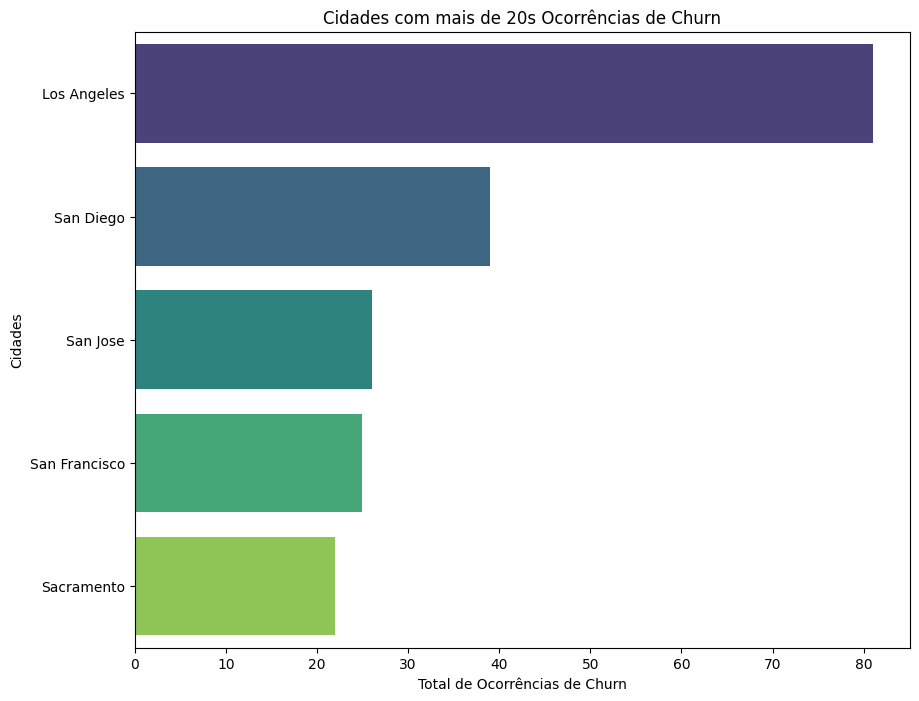

Cidade: Los Angeles, Ocorrências de Churn: 81
Cidade: San Diego, Ocorrências de Churn: 39
Cidade: San Jose, Ocorrências de Churn: 26
Cidade: San Francisco, Ocorrências de Churn: 25
Cidade: Sacramento, Ocorrências de Churn: 22


In [395]:
churn_data = df[df['Churn Label'] == 1]

# número de churns por cidade
churn_counts = churn_data['City'].value_counts()

# considerando significante cidades com mais de 20 ocorrências de churn
significant_cities = churn_counts[churn_counts > 20]

plt.figure(figsize=(10, 8))
sns.barplot(x=significant_cities.values, y=significant_cities.index, palette='viridis')
plt.xlabel('Total de Ocorrências de Churn')
plt.ylabel('Cidades')
plt.title('Cidades com mais de 20s Ocorrências de Churn')
plt.show()
                                                                                                                                                                                    
for city, count in significant_cities.items():
    print(f'Cidade: {city}, Ocorrências de Churn: {count}')

Quantidade de Clientes Antigos: 973
Quantidade de Clientes Antigos com Churn Positivo: 401
Quantidade de Clientes Antigos com Churn Negativo: 572


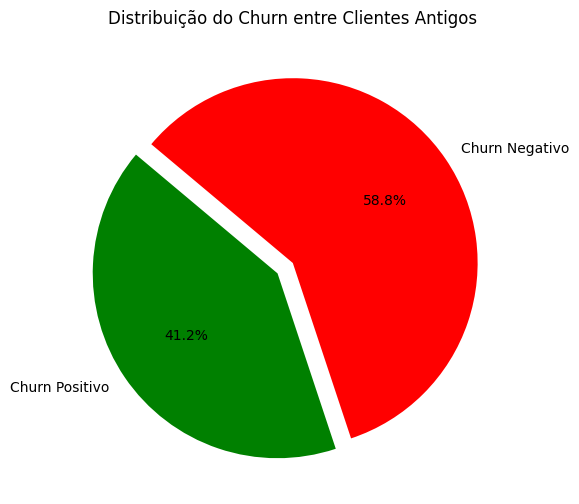

Quantidade de Clientes Novos: 5013
Quantidade de Clientes Novos com Churn Positivo: 1176
Quantidade de Clientes Novos com Churn Negativo: 3837


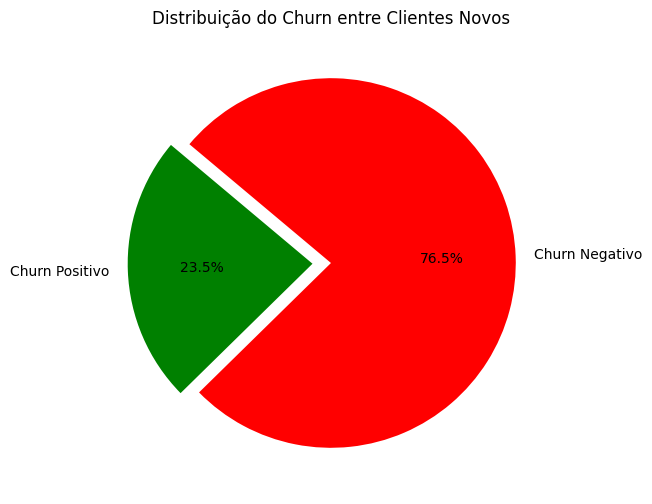

Quantidade de Clientes Antigos com Churn Positivo: 401
Quantidade de Clientes Antigos com Churn Negativo: 572
Quantidade de Clientes Novos com Churn Positivo: 1176
Quantidade de Clientes Novos com Churn Negativo: 3837


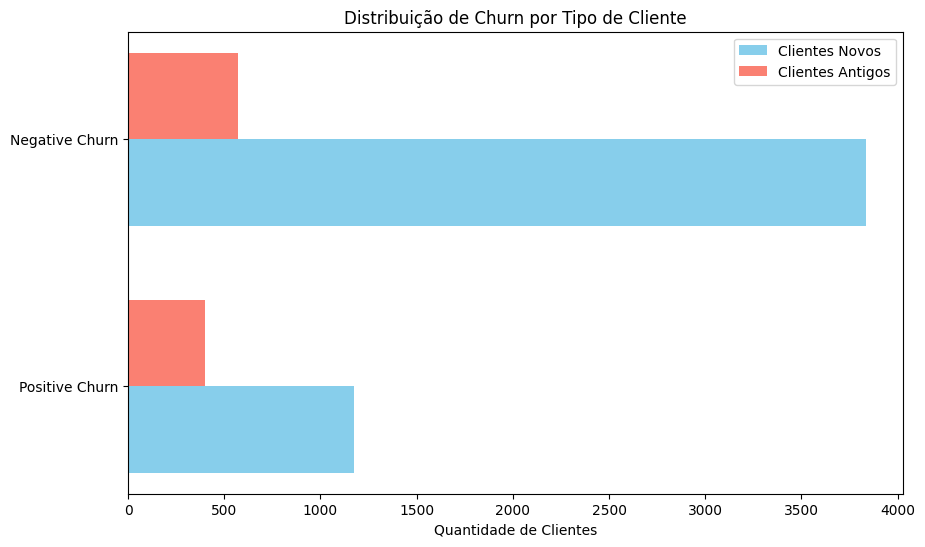

In [396]:
# CLIENTES ANTIGOS -----------------------------------------------------------------------------------------------------

# clientes antigos
senior_clients = df[df['Senior Citizen'] == 1]

total_senior_clients = senior_clients.shape[0]

# Contar o número de ocorrências de churn positiva (Churn= 1) e negativa (Churn= 0) entre clientes antigos
senior_churn_positive_count = senior_clients[senior_clients['Churn Label'] == 1].shape[0]
senior_churn_negative_count = senior_clients[senior_clients['Churn Label'] == 0].shape[0]
print(f"Quantidade de Clientes Antigos: {total_senior_clients}")
print(f"Quantidade de Clientes Antigos com Churn Positivo: {senior_churn_positive_count}")
print(f"Quantidade de Clientes Antigos com Churn Negativo: {senior_churn_negative_count}")

# Gráfico
labels = ['Churn Positivo', 'Churn Negativo']
sizes = [senior_churn_positive_count, senior_churn_negative_count]
colors = ['green', 'red']
explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição do Churn entre Clientes Antigos')
plt.show()

# CLIENTES NOVOS -----------------------------------------------------------------------------------------------------

# clientes novos
junior_clients = df[df['Senior Citizen'] == 0]

total_junior_clients = junior_clients.shape[0]

# Contar o número de ocorrências de churn positiva (Churn= 1) e negativa (Churn= 0) entre clientes novos
junior_churn_positive_count = junior_clients[junior_clients['Churn Label'] == 1].shape[0]
junior_churn_negative_count = junior_clients[junior_clients['Churn Label'] == 0].shape[0]
print(f"Quantidade de Clientes Novos: {total_junior_clients}")
print(f"Quantidade de Clientes Novos com Churn Positivo: {junior_churn_positive_count}")
print(f"Quantidade de Clientes Novos com Churn Negativo: {junior_churn_negative_count}")

# Gráfico
labels = ['Churn Positivo', 'Churn Negativo']
sizes = [junior_churn_positive_count, junior_churn_negative_count]
colors = ['green', 'red']
explode = (0.1, 0) 
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição do Churn entre Clientes Novos')
plt.show()

# AMBOS CLIENTES -----------------------------------------------------------------------------------------------------

# clientes para cada tipo de churn
senior_churn_positive_count = senior_clients[senior_clients['Churn Label'] == 1].shape[0]
senior_churn_negative_count = senior_clients[senior_clients['Churn Label'] == 0].shape[0]
junior_churn_positive_count = junior_clients[junior_clients['Churn Label'] == 1].shape[0]
junior_churn_negative_count = junior_clients[junior_clients['Churn Label'] == 0].shape[0]
print(f"Quantidade de Clientes Antigos com Churn Positivo: {senior_churn_positive_count}")
print(f"Quantidade de Clientes Antigos com Churn Negativo: {senior_churn_negative_count}")
print(f"Quantidade de Clientes Novos com Churn Positivo: {junior_churn_positive_count}")
print(f"Quantidade de Clientes Novos com Churn Negativo: {junior_churn_negative_count}")


# Gráfico
categories = ['Positive Churn', 'Negative Churn']
new_clients = [junior_churn_positive_count, junior_churn_negative_count]
old_clients = [senior_churn_positive_count, senior_churn_negative_count]
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(categories))
bars1 = ax.barh([i - bar_width/2 for i in index], new_clients, bar_width, label='Clientes Novos', color='skyblue')
bars2 = ax.barh([i + bar_width/2 for i in index], old_clients, bar_width, label='Clientes Antigos', color='salmon')
ax.set_xlabel('Quantidade de Clientes')
ax.set_title('Distribuição de Churn por Tipo de Cliente')
ax.set_yticks(index)
ax.set_yticklabels(categories)
ax.legend()
plt.show()


In [397]:
services_columns = ['Phone Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Internet Service_DSL', 'Internet Service_Fiber optic']
service_counts = []

for column in services_columns:
    positive_services = df[df[column] == 1]
    service_positive_count = positive_services.shape[0]
    service_counts.append((column, service_positive_count))

service_counts.sort(key=lambda x: x[1], reverse=True)

for service, count in service_counts:
    print(f"Quantidade de Clientes Que Assinam o Serviço {service}: {count}")



Quantidade de Clientes Que Assinam o Serviço Phone Service: 5401
Quantidade de Clientes Que Assinam o Serviço Internet Service_Fiber optic: 2608
Quantidade de Clientes Que Assinam o Serviço Streaming Movies: 2321
Quantidade de Clientes Que Assinam o Serviço Streaming TV: 2274
Quantidade de Clientes Que Assinam o Serviço Internet Service_DSL: 2060
Quantidade de Clientes Que Assinam o Serviço Device Protection: 2056
Quantidade de Clientes Que Assinam o Serviço Online Backup: 2044
Quantidade de Clientes Que Assinam o Serviço Tech Support: 1743
Quantidade de Clientes Que Assinam o Serviço Online Security: 1696


## **2 - Compare os resultados obtidos entre uma árvore de decisão e uma floresta aleatória em termos de precisão na classificação de churn de clientes. Avalie também outras métricas relevantes, como recall e F1-score, para entender melhor a eficácia de cada modelo na previsão de churn.**

## **MODELO: ÁRVORE DE DECISÃO**

##### TRATAMENTO DA COLUNA CITY

In [398]:
print(df.dtypes)

CustomerID                                 object
City                                       object
Zip Code                                    int64
Latitude                                  float64
Longitude                                 float64
Gender                                      int64
Senior Citizen                              int64
Partner                                     int64
Dependents                                  int64
Tenure Months                               int64
Phone Service                               int64
Multiple Lines                              int64
Online Security                             int64
Online Backup                               int64
Device Protection                           int64
Tech Support                                int64
Streaming TV                                int64
Streaming Movies                            int64
Paperless Billing                           int64
Monthly Charges                           float64


In [399]:
significant_cities = ['Los Angeles', 'Long Beach', 'Sacramento', 'San Diego', 'San Francisco', 'San Jose']

for city in significant_cities:
    df[city] = df['City'].apply(lambda x: 1 if x == city else 0)
    df_test[city] = df_test['City'].apply(lambda x: 1 if x == city else 0)

df = df.drop('City', axis=1)
df_test = df_test.drop('City', axis=1)
cols = [col for col in df.columns if col != 'Churn Label'] + ['Churn Label']
df = df[cols]

df.head()

,CustomerID,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,CLTV,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Internet Service_DSL,Internet Service_Fiber optic,Los Angeles,Long Beach,Sacramento,San Diego,San Francisco,San Jose,Churn Label
0,7590-VHVEG,90001,33.973616,-118.249020,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,3964,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0
1,3038-PQIUY,91917,32.622999,-116.687855,0,0,0,0,38,1,1,1,1,1,0,0,0,1,66.15,2522.4,4933,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0
2,1468-DEFNC,95130,37.277592,-121.986477,1,1,1,1,64,1,1,0,0,0,0,0,0,1,24.40,1548.65,4772,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0
3,6437-UDQJM,90023,34.017697,-118.200577,0,1,1,0,72,1,1,1,1,1,0,1,1,1,84.10,6129.65,4999,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0
4,9490-DFPMD,96142,39.061227,-120.179546,0,1,0,0,42,1,1,0,0,0,0,1,0,1,84.65,3541.35,4871,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,0,1


##### TRATAMENTO DA COLUNA TOTAL CHARGES

In [400]:
ocorrencias_espaco = df['Total Charges'].value_counts().get(' ', 0)

print(f'A string " " ocorre {ocorrencias_espaco} vezes na coluna.')

A string " " ocorre 11 vezes na coluna.


In [401]:
df['Total Charges'] = df['Total Charges'].replace(' ', '0')

ocorrencias_espaco = df['Total Charges'].value_counts().get(' ', 0)
df["Total Charges"] = pd.to_numeric(df["Total Charges"])

# DF TESTE -----------------------------------------------
df_test['Total Charges'] = df_test['Total Charges'].replace(' ', '0')
df_test["Total Charges"] = pd.to_numeric(df_test["Total Charges"])

# PRINTA DADOS DO DF--------------------------------------
print(f'A string " " ocorre {ocorrencias_espaco} vezes na coluna.')

A string " " ocorre 0 vezes na coluna.


In [402]:
print(df['Total Charges'].dtypes)

float64


##### MODELO

In [403]:
# Separar recursos e alvo
X = df.drop(['Churn Label', 'CustomerID'], axis=1)
y = df['Churn Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_clf = clf.predict(X_test)
f1_score_clf = f1_score(y_test, y_pred_clf, average='weighted')
print("Accuracy:", accuracy_score(y_test, y_pred_clf))
print("\nF1 Score:", f1_score_clf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_clf))

Accuracy: 0.7370617696160268

F1 Score: 0.7380145829346672

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       889
           1       0.49      0.50      0.50       309

    accuracy                           0.74      1198
   macro avg       0.66      0.66      0.66      1198
weighted avg       0.74      0.74      0.74      1198



In [404]:
# Garantir que o CustomerID esteja no df_test
customer_ids = df_test['CustomerID']

# Mostrar resultados reais comparados com os preditos
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_clf})
print(results.head())

      Actual  Predicted
4872       0          0
5790       1          1
3670       0          0
1609       0          0
5799       0          0


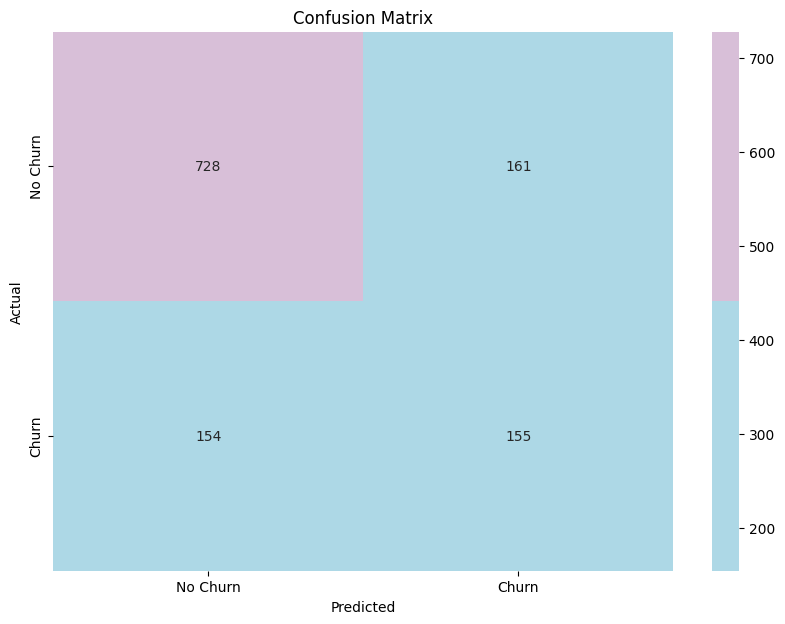

In [405]:
# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_clf)

cmap = sns.color_palette(["#ADD8E6", "#D8BFD8"])

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## **MODELO: FLORESTA ALEATÓRIA**

##### MODELO

In [406]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)
f1_score_rfc = f1_score(y_test, y_pred_rfc, average='weighted')
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("\nF1 Score:", f1_score_rfc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rfc))

Accuracy: 0.8088480801335559

F1 Score: 0.7992121513861294

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       889
           1       0.67      0.50      0.58       309

    accuracy                           0.81      1198
   macro avg       0.76      0.71      0.73      1198
weighted avg       0.80      0.81      0.80      1198



In [407]:
# Garantir que as colunas de df_test estejam alinhadas com as de df_train
df_test = df_test.reindex(columns=X.columns, fill_value=0)

# Mostrar resultados reais comparados com os preditos
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_clf})
print(results.head())

      Actual  Predicted
4872       0          0
5790       1          1
3670       0          0
1609       0          0
5799       0          0


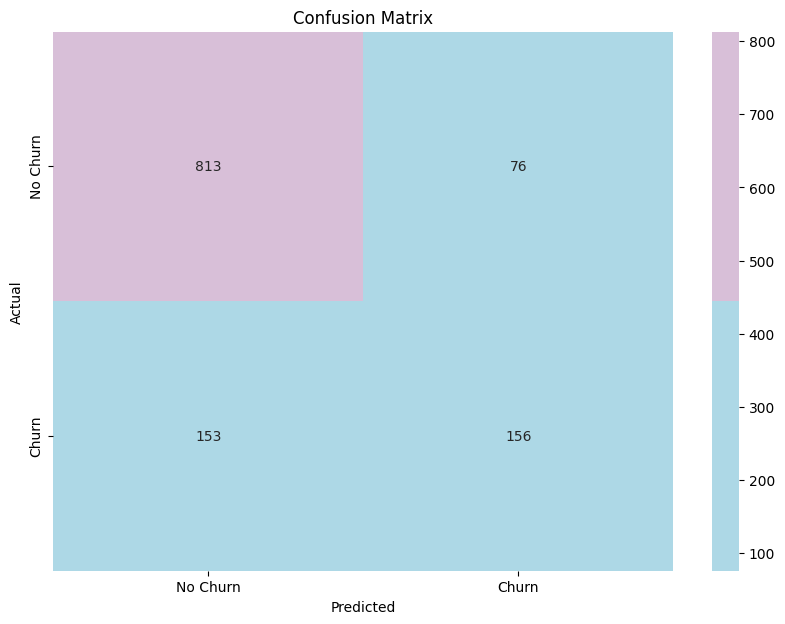

In [408]:
# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_rfc)

cmap = sns.color_palette(["#ADD8E6", "#D8BFD8"]) 

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## **RESULTADOS MODELOS**

In [409]:
if f1_score_clf > f1_score_rfc:
    print("O modelo de Árvore de Decisão possui um F1-SCORE superior ao modelo de Random Forest")
    print(f'F1-SCORE da Árvore de Decisão: {f1_score_clf:.2f}')
    print(f'F1-SCORE do Random Forest: {f1_score_rfc:.2f}')
else:
    print("O modelo de Random Forest possui um F1-SCORE superior ao modelo de Árvore de Decisão")
    print(f'F1-SCORE do Random Forest: {f1_score_rfc:.2f}')
    print(f'F1-SCORE da Árvore de Decisão: {f1_score_clf:.2f}')

O modelo de Random Forest possui um F1-SCORE superior ao modelo de Árvore de Decisão
F1-SCORE do Random Forest: 0.80
F1-SCORE da Árvore de Decisão: 0.74


In [410]:
df_test

,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,CLTV,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Internet Service_DSL,Internet Service_Fiber optic,Los Angeles,Long Beach,Sacramento,San Diego,San Francisco,San Jose
0,93531.0,35.214982,-118.590490,0.0,0.0,0.0,0.0,15.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,85.9,1269.55,3579.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0
1,95207.0,38.002125,-121.324979,1.0,0.0,1.0,0.0,18.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,56.8,1074.65,5558.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0
2,94579.0,37.687264,-122.157280,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,40.90,2237.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0
3,91423.0,34.146957,-118.432138,1.0,1.0,1.0,0.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,84.2,519.15,5834.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0
4,92563.0,33.581045,-117.147190,1.0,0.0,0.0,0.0,40.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,104.8,4131.95,3492.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0,0,0,0,0
5982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0
5983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0
5984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0


#### SUBMISSION.CSV

In [411]:
predictions = rfc.predict(df_test)

# Criando o DataFrame de submissão
submission = pd.DataFrame({'CustomerID': customer_ids, 'Churn Label': predictions})

# Substituindo 1 por 'Yes' e 0 por 'No' na coluna 'Churn Label'
submission['Churn Label'] = submission['Churn Label'].replace({1: 'Yes', 0: 'No'})

submission = submission.dropna()

# Salvando o DataFrame em um arquivo CSV
submission.to_csv('submission.csv', index=False)
print("Previsões salvas em 'submission.csv'")

Previsões salvas em 'submission.csv'


## **3 - Demonstre o uso da validação cruzada para avaliar o desempenho de um modelo de machine learning. Inclua uma descrição dos tipos comuns de validação cruzada e como cada um pode ser aplicado para melhorar a generalização do modelo.**



#### **R:** Alguns tipos comuns de validação cruzada são: K-Fold (É o tipo mais comum, usado principalmente em conjuntos de dados de tamanho moderado e principalmente balanceados), HoldOut (Usado para avaliações rápidas em modelos muito grandes), Leave-One-Out (Não recomendado para conjuntos de dados muito grandes, fornece estimativa confiável e imparcial para o modelo), etc.

Fonte de pesquisa: https://www.turing.com/kb/different-types-of-cross-validations-in-machine-learning-and-their-explanations

In [412]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rfc, X_train, y_train, cv=kf, scoring='accuracy')

print(f'Acurácias da Validação Cruzada k-fold: {scores}')
print(f'Média da Acurácia: {np.mean(scores):.4f}')

Acurácias da Validação Cruzada k-fold: [0.79436326 0.78183716 0.80271399 0.79310345 0.79519331]
Média da Acurácia: 0.7934


## **4 - Como a aplicação de técnicas de redução de dimensionalidade, como PCA (Análise de Componentes Principais), afeta o desempenho dos modelos de predição de churn?**

#### **R:** O PCA pode ser uma ótima técnica para tratar questões como Redução de Overfitting e ruído e condensar as informações em componentes menores

In [413]:
# Aplicando PCA para Redução de Dimensionalidade
pca = PCA(n_components=0.95)  # Mantém 95% da variância explicada
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Treinando o modelo com os dados transformados por PCA
rfc.fit(X_train_pca, y_train)

# Realizando a validação cruzada com os dados transformados por PCA
scores_pca = cross_val_score(rfc, X_train_pca, y_train, cv=kf, scoring='accuracy')

# Avaliando o desempenho após PCA
y_pred_pca = rfc.predict(X_test_pca)
print(f'Acurácias com PCA: {scores_pca}')
print(f'Média da Acurácia com PCA: {np.mean(scores_pca):.4f}')

Acurácias com PCA: [0.71189979 0.70876827 0.72338205 0.70950888 0.71055381]
Média da Acurácia com PCA: 0.7128


In [414]:
# Carregar o arquivo CSV
submission_df = pd.read_csv('submission.csv')

# Substituir a coluna ID com uma sequência de números começando de 1
submission_df['CustomerID'] = range(1, len(submission_df) + 1)

# Salvar o DataFrame modificado de volta em um arquivo CSV
submission_df.to_csv('submissionP2.csv', index=False)